<a href="https://colab.research.google.com/github/Nik211885/machine_learning_quatity_water/blob/main/water_quatity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import sklearn.preprocessing as sklp
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [10]:
df = pd.read_csv('./water_potability.csv')

In [11]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
for label in df[df.columns[:-1]]:
  plt.hist(df[df['Potability']==1][label],label ='Drinkable',alpha = 0.7,density = True)
  plt.hist(df[df['Potability']==0][label],label ='Should Not Drink',alpha = 0.7,density = True)
  plt.xlabel(label)
  plt.ylabel('Potability')
  plt.legend()
  plt.show()

Dữ liệu không tuyến tính

#Xử lý dữ liệu

In [13]:
from sklearn.model_selection import train_test_split


Split data



In [14]:
#Lấp đầy các dữ liệu nan bằng 1 giá trị triung bình trên tập means trung bình trên tập
df.fillna(df.mean(), inplace=True)

# Lay ngau nhien 80% trong tap df lam tap huan luyện và 20 % test để đánh giá mô hình
train, test = train_test_split(df,train_size=0.8)

In [15]:
def scale_data(dataframe,over = 1):
  X = dataframe[dataframe.columns[:-1]]
  Y = dataframe[dataframe.columns[-1]]
  if(over):
    #Lấy mẫu sau cho cân bằng nhất
    r = RandomOverSampler()
    X,Y = r.fit_resample(X,Y)

  # Chuẩn hóa dữ liệu đầu vào
  scaler = sklp.StandardScaler()

  X = scaler.fit_transform(X)

  return X,Y

In [16]:
X_train, y_train = scale_data(train)
X_test, y_test = scale_data(test)

#Triển khai các mô hình

#Support Vector Machine Learning(SVM)

In [17]:
from sklearn.svm import SVC

In [59]:
svc_model =SVC()

In [60]:
svc_model.fit(X_train,y_train)

SVC()

In [61]:
y_pred =  svc_model.predict(X_test)

In [62]:
print(classification_report(y_test,y_pred))
acc_score = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.62      0.71      0.66       400
           1       0.66      0.56      0.61       400

    accuracy                           0.64       800
   macro avg       0.64      0.64      0.63       800
weighted avg       0.64      0.64      0.63       800



Test kernel

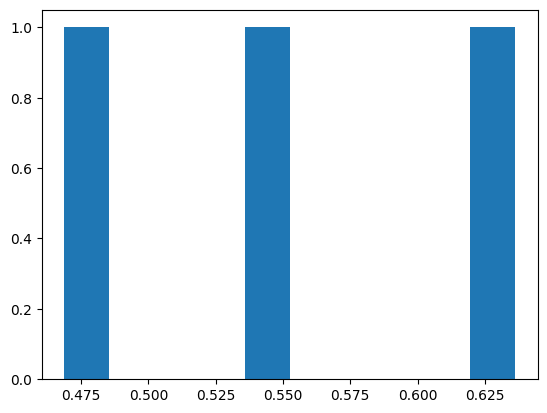

In [90]:
acc_list = []
kernels = ['poly','rbf','sigmoid']
for kernel in kernels:
  svc_test = SVC(kernel = kernel)
  svc_test.fit(X_train,y_train)
  y_pred = svc_test.predict(X_test)
  acc_test = accuracy_score(y_test,y_pred)
  acc_list.append(acc_test)
  if(acc_test > acc_score):
      acc_score = acc_test
      svc_model = svc_test
plt.hist((acc_list))
plt.show()

kernel = rbf(radius bais funtion) đang có mức hiệu suất tốt hơn

Change parameter C với kernel = rbf

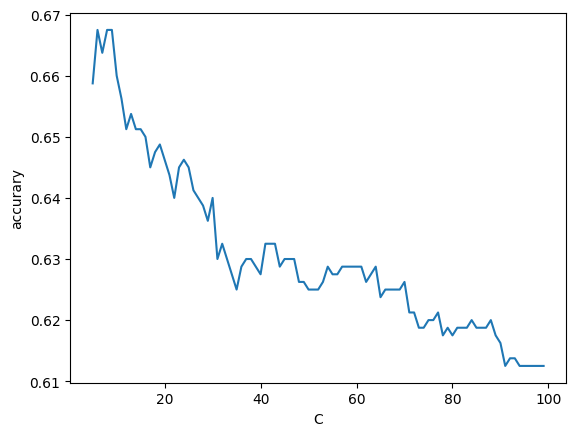

In [65]:
C = np.arange(5,100,1)
acc_list = []
for c in C:
  svc_test = SVC(C=c)
  svc_test.fit(X_train,y_train)
  y_pred = svc_test.predict(X_test)
  acc_test = accuracy_score(y_test,y_pred)
  acc_list.append(acc_test)
  if(acc_test > acc_score):
      acc_score = acc_test
      svc_model = svc_test
plt.plot(C,np.array(acc_list))
plt.xlabel('C')
plt.ylabel('accurary')
plt.legend
plt.show()

    Dữ liệu khi chạy với C từ 0.001 - 5 với step = 0.1

  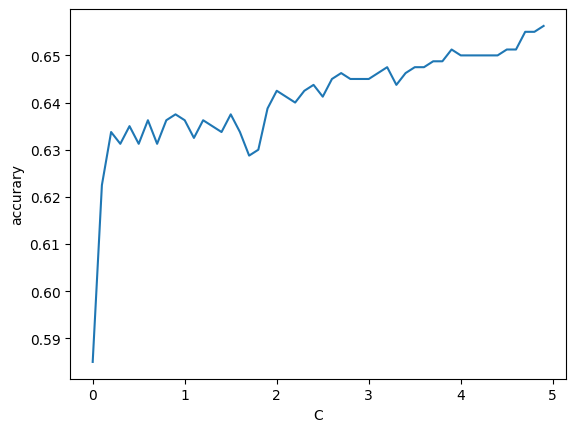

In [66]:
accuracy_score(y_test,svc_model.predict(X_test))

0.6675